# Forest analysis of Subtropical Mountain System in India 
For this analysis, I have chosen 'Subtropical Mountain System' forest. This kind of forest is spread across various states in India but in this analysis, we will only look through the states of Himachal Pradesh (HP) and Uttarakhand (UK). Majority of the region of this kind of forest in HP and UK falls under the Himalayan Biodiversity Hotspot (1 of the 4 such hotspots in India). <br><br>
Both HP and UK have 'Subtropical Mountain System' and 'Tropical Mountain System'
forests. In this notebook, we will only analyse Subtropical Mountain System forests.<br>

In general, forest % of available land in both the states are as follows:<br>
* Himachal Pradesh: 24.61% <br>
Distribution of species follows altitudinal zonation. The vegetation varies from dry scrub forests at lower altitudes to alpine pastures at higher altitudes. In between these two extremes, distinct vegetational zones of Mixed Deciduous Forests, Bamboo, Chir Pine, Oak, Deodar, Kail, Fir and Spruce are found. <br>
Source: [link](https://fsi.nic.in/isfr19/vol2/isfr-2019-vol-ii-himachal-pradesh.pdf)
* Uttarakhand:      63.41%<br>
Distribution of species follows altitudinal zonation. Various vegetation that is found ranges from Shore Robusta (Sal), Chir Pine, Deodar, Cedar to Ribes and Junipers. 
Source: [link](https://fsi.nic.in/isfr19/vol2/isfr-2019-vol-ii-uttarakhand.pdf), [link to UK gov site](https://forest.uk.gov.in/about-us)

<br><br>
With the rapid change in climate, the biodiversity of these regions is also at high risk. A shift in the type of climate will have adverse effect on vegetation. It can be observed by the 4 emmission scenarios that the 'Monsoon-influenced humid subtropical climate' will be pushed out further in the north eastern direction. By the end of this century, it is predicted that the Subtropical Mountain system in HP and UK will have very small or close to no regions with 'Tundra climate' and 'Subarctic climate'. There will also be a shift of 'Tropical Savanna Climate' into the two states.  <br>




In [1]:
!conda --version

conda 4.9.2


In [2]:
#run twice
!pip install -q condacolab
import condacolab
condacolab.install()  

✨🍰✨ Everything looks OK!


In [5]:
!conda install geopandas
import geopandas as gpd

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done

# All requested packages already installed.



In [6]:
import os, zipfile, glob, io, requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for SIG and spatial info management
from shapely.geometry import Polygon, shape

# Ignore warning about missing/empty geometries
import warnings
warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
plt.rcParams.update({'figure.max_open_warning': 0})

# for dependencies
%matplotlib inline

# 0. India's administrative Boundary


In [7]:
def get_df(link):
    #Gets a download url to a json/geojson file and returns its content
    req = requests.get(link).content
    return gpd.read_file(io.StringIO(req.decode('utf-8')))

In [8]:
#India's Administrative Boundary
ind_boundary = 'https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level2%20by%20Country/IND/IND_AL2_India.json'
ind_boundary_df  = get_df(ind_boundary)

ind_boundary_df  = ind_boundary_df[['name', 'geometry']]

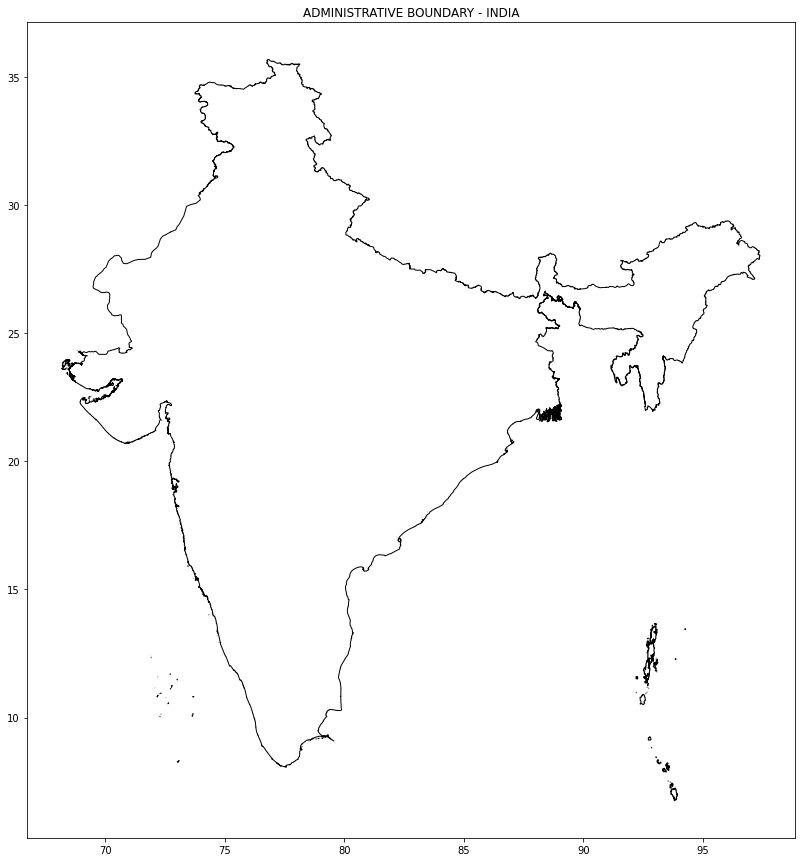

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
ax.set_title('ADMINISTRATIVE BOUNDARY - INDIA')
ind_boundary_df.plot(ax=ax, color='none', edgecolor='black')

plt.show()

# 1. Biodiveristy Hotspots in India

In [12]:
#India's Biodiversity Hotspots
bio_hotspot = 'https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/CI_BiodiversityHotspots.geojson'
bio_hotspot_df = get_df(bio_hotspot)

#Standardizing column names
bio_hotspot_df.columns = bio_hotspot_df.columns.str.lower()
bio_hotspot_df = bio_hotspot_df[['name', 'type', 'geometry']]

#Getting only necessary data
bio_hotspot_df = bio_hotspot_df.clip(ind_boundary_df)

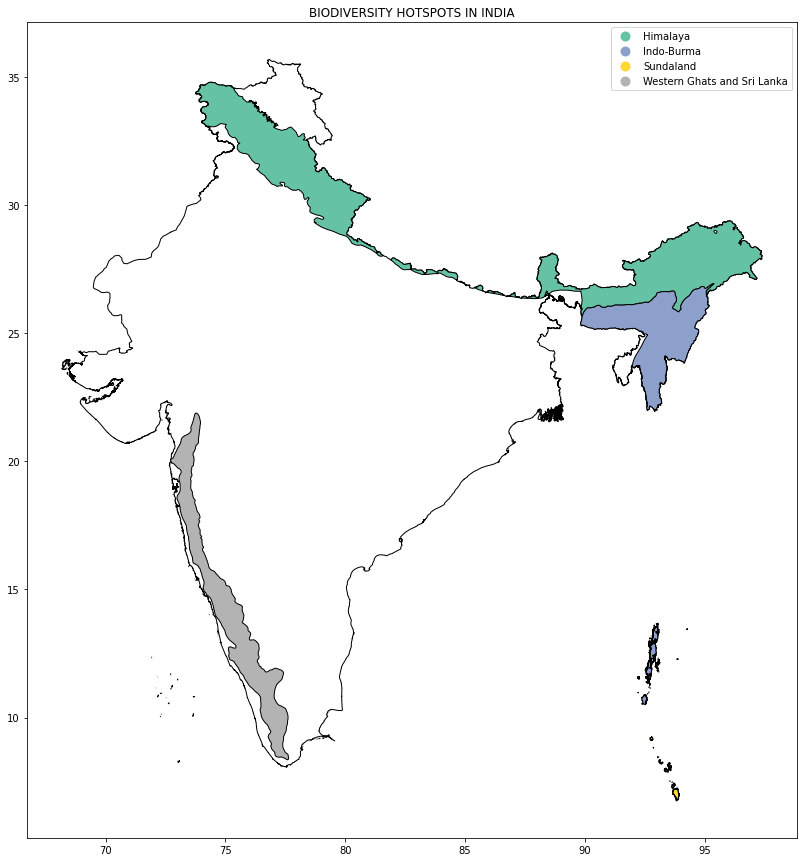

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
ind_boundary_df.plot(ax=ax, color='none', edgecolor='black')
ax.set_title('BIODIVERSITY HOTSPOTS IN INDIA')
bio_hotspot_df.plot(ax=ax, cmap='Set2', column='name', edgecolor='black', legend=True)

plt.show()

# 2. Forest Cover

In [14]:
#Retrieving gez (global ecological zones) in India
ind_forest = 'https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level2%20by%20Country/IND/IND_AL2_India_GEZ.json'
ind_forest_df  = get_df(ind_forest)

#Standardizing column names
ind_forest_df.columns = ind_forest_df.columns.str.lower()

print("India has the following forests: ")
print(ind_forest_df['gez_name'])

India has the following forests: 
0    Subtropical mountain system
1             Subtropical steppe
2      Temperate mountain system
3                Tropical desert
4            Tropical dry forest
5          Tropical moist forest
6       Tropical mountain system
7            Tropical rainforest
8             Tropical shrubland
Name: gez_name, dtype: object


This analysis focuses on Subtropical mountain system

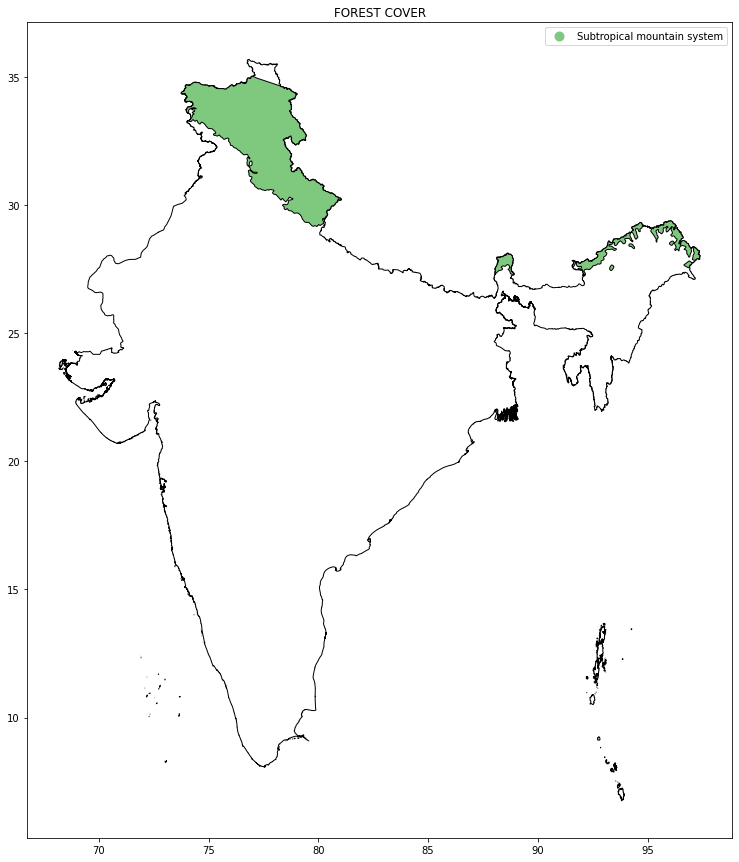

In [15]:
#Getting only necessary data
df_subtropical_mountain = ind_forest_df[ind_forest_df['gez_name'] == 'Subtropical mountain system']
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
ind_boundary_df.plot(ax=ax, color='none', edgecolor='black')
ax.set_title('FOREST COVER')
df_subtropical_mountain.plot(ax=ax, cmap='Accent', column='gez_name', edgecolor='black', legend=True)

plt.show()

# 3.1 Himachal Pradesh Administrative Boundary

In [16]:
#HP Administrative Boundary
hp_boundary = 'https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/IND/IND_AL4_Himachal%20Pradesh.json'
hp_boundary_df  = get_df(hp_boundary)

# 3.2 Uttarakhand Administrative Boundary

In [17]:
#UK Administrative Boundary
uk_boundary = 'https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/IND/IND_AL4_Uttarakhand.json'
uk_boundary_df  = get_df(uk_boundary)

The Concatinated Administrative Boundaries and Forest Cover is as follows:

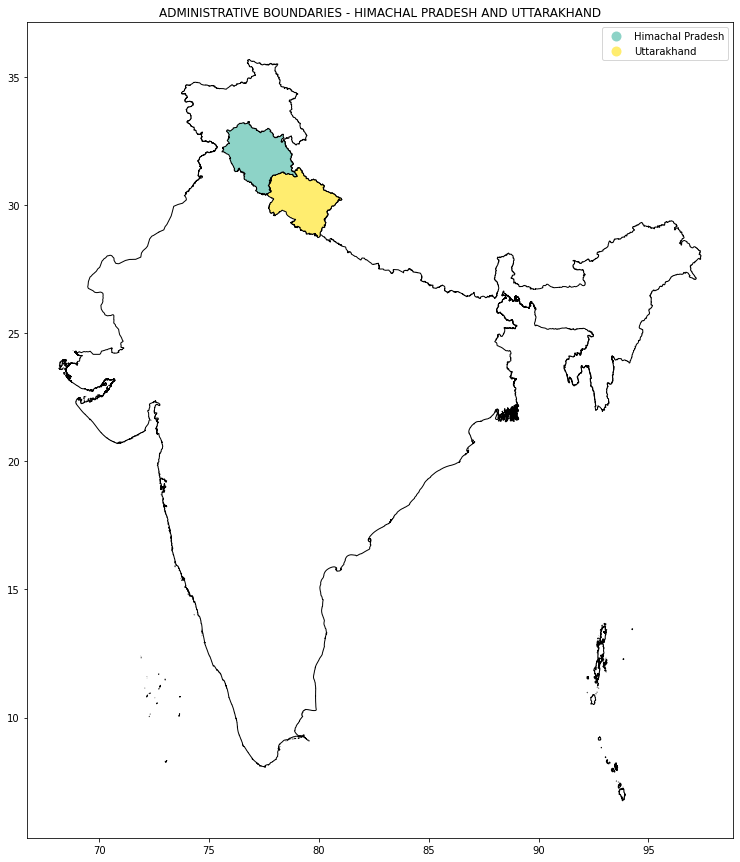

In [18]:
#Concatinated Administrative Boundary
#Getting only necessary data
uk_boundary_df = uk_boundary_df[['name', 'geometry']]
hp_boundary_df = hp_boundary_df[['name', 'geometry']]
concat_boundary_df = pd.concat([uk_boundary_df, hp_boundary_df], axis=0)
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
ax.set_title('ADMINISTRATIVE BOUNDARIES - HIMACHAL PRADESH AND UTTARAKHAND')
ind_boundary_df.plot(ax=ax, color='none', edgecolor='black')
concat_boundary_df.plot(ax=ax, edgecolor='Black', cmap='Set3', column = 'name', legend=True)

plt.show()

In [19]:
#Combined Forest Cover
hp_forest = 'https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/IND/IND_AL4_Himachal%20Pradesh_GEZ.json'
hp_forest_df  = get_df(hp_forest)
hp_forest_subtropical_df = hp_forest_df[hp_forest_df['gez_name'] == 'Subtropical mountain system']

uk_forest = 'https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/IND/IND_AL4_Uttarakhand_GEZ.json'
uk_forest_df  = get_df(uk_forest)
uk_forest_subtropical_df = uk_forest_df[uk_forest_df['gez_name'] == 'Subtropical mountain system']

concat_forest_df = pd.concat([uk_forest_subtropical_df, hp_forest_subtropical_df], axis=0)
concat_forest_df= concat_forest_df[['gez_name','geometry']]

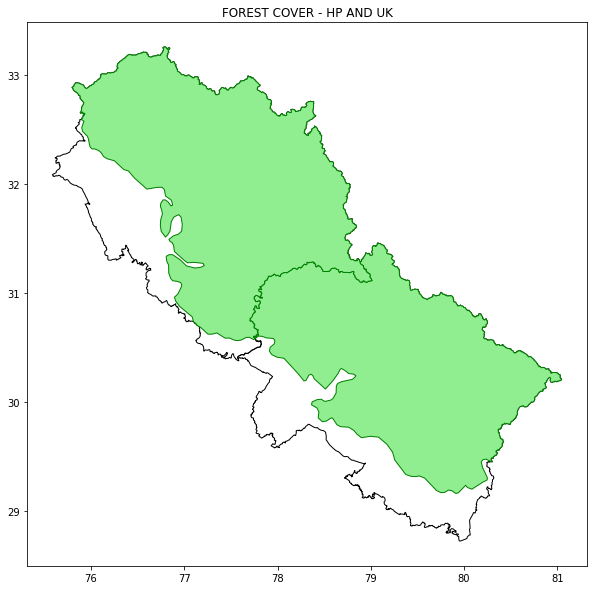

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
concat_boundary_df.plot(ax=ax, color='none', edgecolor='black')
ax.set_title('FOREST COVER - HP AND UK')
concat_forest_df.plot(ax=ax, color='lightgreen', edgecolor='green')

plt.show()

# 4. Biodiversity Hotspots in the combined area

In [21]:
#Getting only necessary data
bio_hotspot_df = bio_hotspot_df.clip(concat_boundary_df)

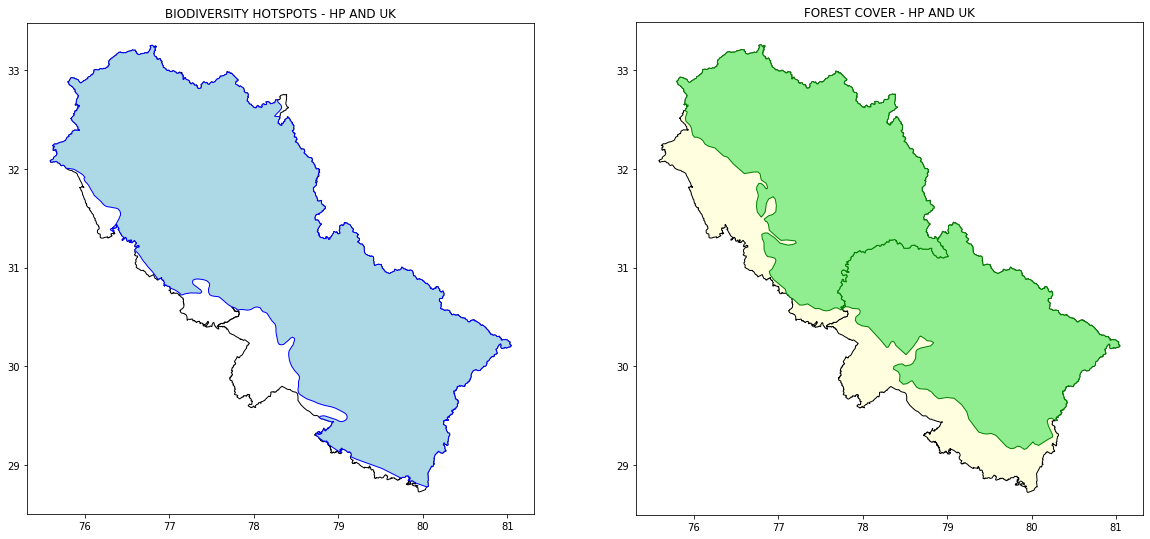

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))
concat_boundary_df.plot(ax=ax1, color='none', edgecolor='black')
ax1.set_title('BIODIVERSITY HOTSPOTS - HP AND UK')
concat_boundary_df.plot(ax=ax, color='lightyellow', edgecolor='black')
bio_hotspot_df.plot(ax=ax1, color='lightblue', edgecolor='blue')

#fig, ax = plt.subplots(1, 1, figsize=(15, 10))
concat_boundary_df.plot(ax=ax2, color='lightyellow', edgecolor='black')
ax2.set_title('FOREST COVER - HP AND UK')
concat_forest_df.plot(ax=ax2, color='lightgreen', edgecolor='green')

plt.show()

# 5. Soil Cover

In [23]:
#Retrieving soil resources in India
ind_soil = 'https://datasets.mojaglobal.workers.dev/0:/Soil/World%20Soil%20Resources/byCountry/IND_AL2_India_WSR.json'
ind_soil_df  = get_df(ind_soil)

#Standardizing column names
ind_soil_df.columns = ind_soil_df.columns.str.lower()

#Getting only necessary data
ind_soil_df = ind_soil_df[['ipcc', 'geometry']]
soil_df = ind_soil_df.clip(concat_forest_df)

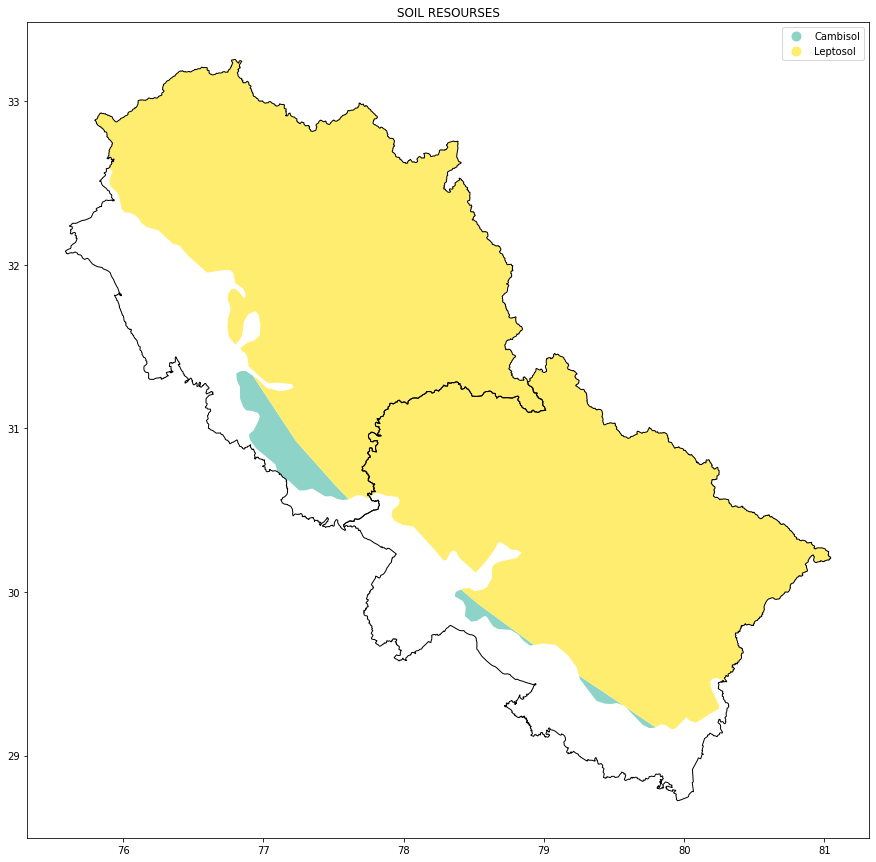

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
ax.set_title('SOIL RESOURSES')
soil_df.plot(ax=ax, cmap='Set3', column='ipcc', legend=True)
concat_boundary_df.plot(ax=ax, color='none', edgecolor='black')

plt.show() 

# 6. Holdridge Life Zones


In [25]:
#Retrieving Holdridge Life Zones
hlz = 'https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/HoldridgeLifeZones.json'
hlz_df  = get_df(hlz)

#Standardizing column names
hlz_df.columns = hlz_df.columns.str.lower()

#Getting only necessary data
hlz_df = hlz_df[['desc', 'geometry']]
hlz_df = hlz_df.clip(concat_forest_df)

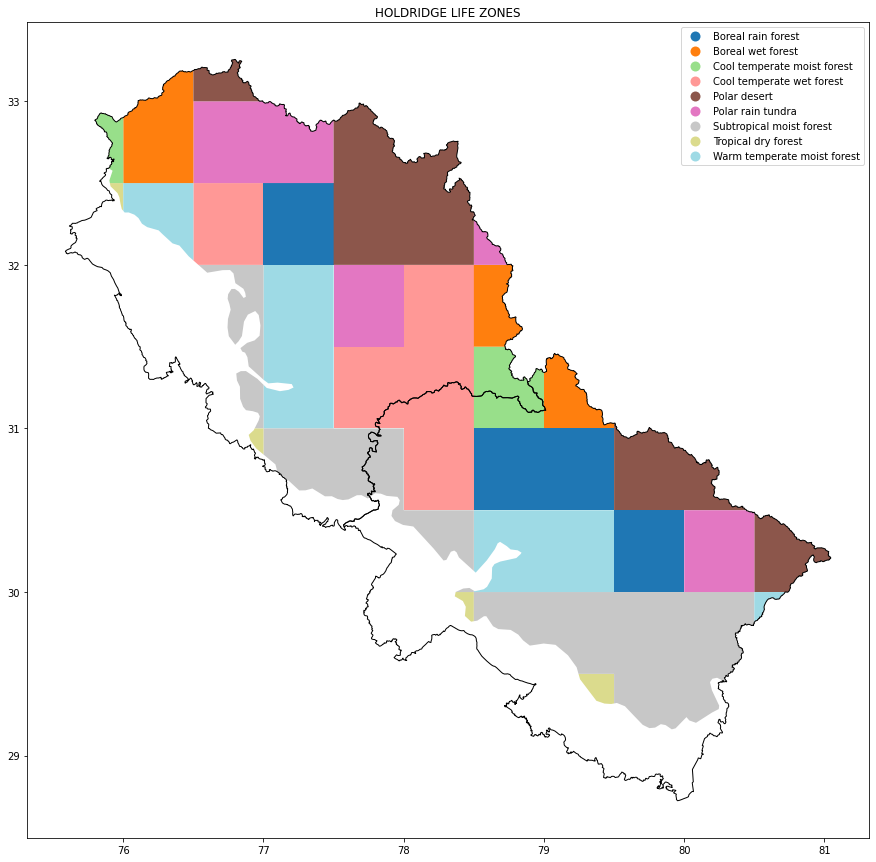

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
ax.set_title('HOLDRIDGE LIFE ZONES')
hlz_df.plot(ax=ax, cmap='tab20', column='desc', legend=True)
concat_boundary_df.plot(ax=ax, color='none', edgecolor='black')

plt.show()

# 7. Climate Zones

In [27]:
#Retrieving Climate zones
climate    = 'https://datasets.mojaglobal.workers.dev/0:/Climate/IPCC_ClimateZoneMap_Vector.geojson'
climate_df = get_df(climate)

#Standardizing column names
climate_df.columns = climate_df.columns.str.lower()

#Getting only necessary data
climate_df = climate_df.clip(concat_forest_df)

In [28]:
#Replacing the data that was in codes
classification =  {'1': 'Tropical montane', '2' : 'Tropical wet', 
                   '3': 'Tropical moist', '4': 'Tropical dry', 
                   '5': 'Warm temperate moist', '6': 'Warm temperate dry',
                   '7': 'Cool temperate moist', '8': 'Cool temperate dry',
                   '9': 'Boreal moist', '10': 'Boreal dry', '11' : 'Polar moist',
                   '12': 'Polar dry'}


#Renaming class_name
climate_df.class_name = climate_df.class_name.astype('str').replace(classification)

#Removing oceans
climate_df =  climate_df.loc[climate_df.class_name != '0']

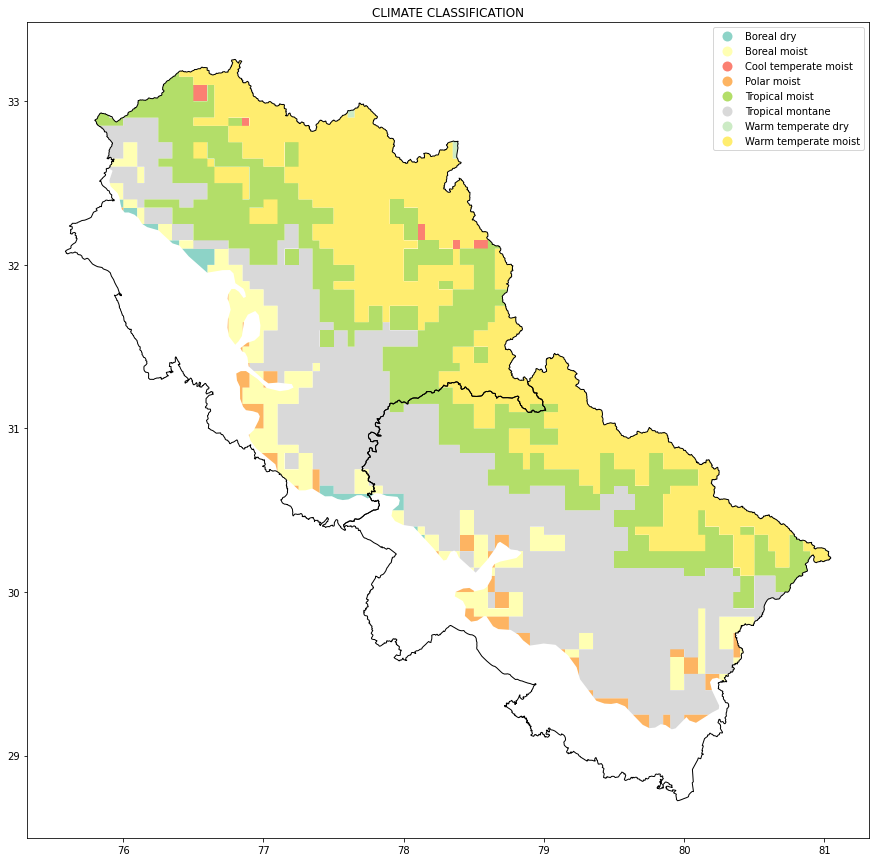

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
ax.set_title('CLIMATE CLASSIFICATION')
climate_df.plot(ax=ax, cmap='Set3', column='class_name', legend=True)
concat_boundary_df.plot(ax=ax, color='none', edgecolor='black')

plt.show()

# 8. Agro-ecological Zones

In [30]:
#Retrieving Agro-ecological Zones
agroeco_zones = 'https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/GAEZ_Global_AgroEcological_Zones/GlobalAgroEcologicalZones_GAEZ.geojson'
agroeco_zones_df = get_df(agroeco_zones)

#Standardizing column names
agroeco_zones_df.columns = agroeco_zones_df.columns.str.lower()

In [31]:
# Replacing the data that was in codes
values = {'1': 'Steep terrain', '2': 'Artic/Cold', '3': 'Desert/Arid', 
          '4': 'Irrigated Soils', '5': 'Hydromorphic soils', 
          '6': 'Dry, good soils', '7': 'Dry, moderate soils', '8': 'Dry, poor soils', 
          '9': 'Moist, good soils', '10': 'Moist, moderate soils', 
          '11': 'Moist, poor soils', '12': 'Sub-humid, good soils', 
          '13': 'Sub-humid, moderate soils', '14': 'Sub-humid, poor soils', 
          '15': 'Humid, good soils', '16': 'Humid, moderate soils', 
          '17': 'Humid, poor soils', '18': 'Water'}


#Replacing classification codes with actual names
agroeco_zones_df.value = agroeco_zones_df.value.astype('str').replace(values)

#Getting only necessary data
agroeco_zones_df = agroeco_zones_df.clip(concat_forest_df)

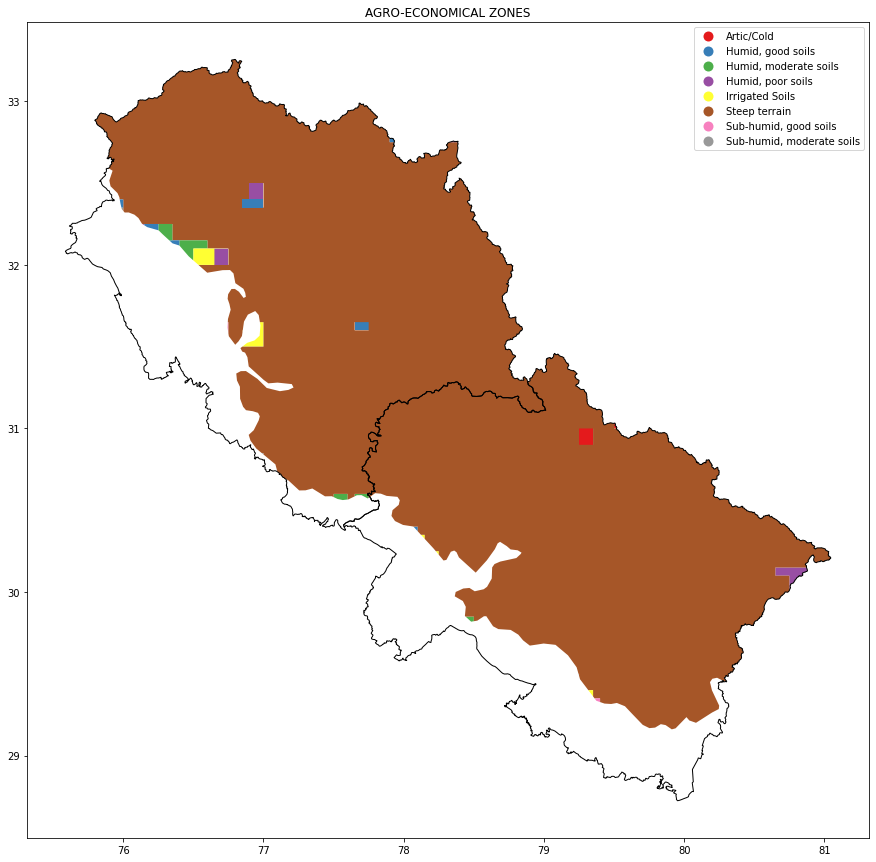

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
ax.set_title('AGRO-ECONOMICAL ZONES')
agroeco_zones_df.plot(ax=ax, cmap='Set1', column='value', legend=True)
concat_boundary_df.plot(ax=ax, color='none', edgecolor='black')

plt.show()

# 9. Koppen-Geiger Climate Changes (1901-2100)

In [33]:
!wget "https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/KoppenGeigerClimateShifts.zip"
import zipfile
with zipfile.ZipFile("KoppenGeigerClimateShifts.zip","r") as zip_ref:
    zip_ref.extractall("climate_change_data")


--2022-04-21 14:21:09--  https://datasets.mojaglobal.workers.dev/0:/Climate/KoppenGeiger_ClimateShifts1901_2100/KoppenGeigerClimateShifts.zip
Resolving datasets.mojaglobal.workers.dev (datasets.mojaglobal.workers.dev)... 104.21.60.214, 172.67.201.202, 2606:4700:3034::ac43:c9ca, ...
Connecting to datasets.mojaglobal.workers.dev (datasets.mojaglobal.workers.dev)|104.21.60.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2872855 (2.7M) [application/x-zip-compressed]
Saving to: ‘KoppenGeigerClimateShifts.zip’

KoppenGeigerClimate 100%[===================>]   2.74M  --.-KB/s    in 0.1s    

2022-04-21 14:21:19 (20.6 MB/s) - ‘KoppenGeigerClimateShifts.zip’ saved [2872855/2872855]



In [34]:
#Removing zip
%rm KoppenGeigerClimateShifts.zip

#Adding path to the folder
files = glob.glob(os.path.join('/content/climate_change_data', '*geojson'))

In [35]:
files

['/content/climate_change_data/2051-2075-A2.geojson',
 '/content/climate_change_data/2001-2025-A2.geojson',
 '/content/climate_change_data/2001-2025-B1.geojson',
 '/content/climate_change_data/2001-2025-B2.geojson',
 '/content/climate_change_data/2051-2075-B2.geojson',
 '/content/climate_change_data/1951-1975.geojson',
 '/content/climate_change_data/2026-2050-B2.geojson',
 '/content/climate_change_data/2026-2050-A2.geojson',
 '/content/climate_change_data/2076-2100-A2.geojson',
 '/content/climate_change_data/1976-2000.geojson',
 '/content/climate_change_data/2076-2100-B2.geojson',
 '/content/climate_change_data/2026-2050-A1FI.geojson',
 '/content/climate_change_data/2076-2100-B1.geojson',
 '/content/climate_change_data/1901-1925.geojson',
 '/content/climate_change_data/2026-2050-B1.geojson',
 '/content/climate_change_data/2001-2025-A1FI.geojson',
 '/content/climate_change_data/2076-2100-A1FI.geojson',
 '/content/climate_change_data/2051-2075-A1FI.geojson',
 '/content/climate_change_dat

In [36]:
A1FIfiles = glob.glob(os.path.join('/content/climate_change_data', '*A1FI.geojson'))
A1FIfiles

['/content/climate_change_data/2026-2050-A1FI.geojson',
 '/content/climate_change_data/2001-2025-A1FI.geojson',
 '/content/climate_change_data/2076-2100-A1FI.geojson',
 '/content/climate_change_data/2051-2075-A1FI.geojson']

In [37]:
A2files = glob.glob(os.path.join('/content/climate_change_data', '*A2.geojson'))
A2files

['/content/climate_change_data/2051-2075-A2.geojson',
 '/content/climate_change_data/2001-2025-A2.geojson',
 '/content/climate_change_data/2026-2050-A2.geojson',
 '/content/climate_change_data/2076-2100-A2.geojson']

In [38]:
B1files = glob.glob(os.path.join('/content/climate_change_data', '*B1.geojson'))
B1files

['/content/climate_change_data/2001-2025-B1.geojson',
 '/content/climate_change_data/2076-2100-B1.geojson',
 '/content/climate_change_data/2026-2050-B1.geojson',
 '/content/climate_change_data/2051-2075-B1.geojson']

In [39]:
B2files = glob.glob(os.path.join('/content/climate_change_data', '*B2.geojson'))
B2files

['/content/climate_change_data/2001-2025-B2.geojson',
 '/content/climate_change_data/2051-2075-B2.geojson',
 '/content/climate_change_data/2026-2050-B2.geojson',
 '/content/climate_change_data/2076-2100-B2.geojson']

## 9.1 Shifts bases on observations

In [40]:
rem_files = glob.glob(os.path.join('/content/climate_change_data', '*[0-9][0-9].geojson'))
rem_files

['/content/climate_change_data/1951-1975.geojson',
 '/content/climate_change_data/1976-2000.geojson',
 '/content/climate_change_data/1901-1925.geojson',
 '/content/climate_change_data/1926-1950.geojson']

In [41]:
koppen_abb = {'11': 'Af', '12': 'Am', '13': 'As', '14': 'Aw', '21': 'BWk', 
              '22': 'BWh', '26': 'BSk', '27': 'BSh', '31': 'Cfa', 
              '32': 'Cfb', '33': 'Cfc', '34': 'Csa', '35': 'Csb', 
              '36': 'Csc', '37': 'Cwa', '38': 'Cwb', '39': 'Cwc', 
              '41': 'Dfa', '42': 'Dfb', '43': 'Dfc', '44': 'Dfd', 
              '45': 'Dsa', '46': 'Dsb', '47': 'Dsc', '48': 'Dsd', 
              '49': 'Dwa', '50': 'Dwb', '51': 'Dwc', '52': 'Dwd', 
              '61': 'EF', '62': 'ET', '0': 'NaN'}

koppen_term ={'Af' : 'Tropical rainforest climate', 'Am' : 'Tropical monsoon climate', 
              'As' : 'Tropical savanna climate with dry-summer characteristics', 
              'Aw' : 'Tropical savanna climate with dry-winter characteristics', 
              'BWk' : 'Cold desert climate', 'BWh' : 'Hot desert climate', 
              'BSk' : 'Cold semi-arid climate', 'BSh' : 'Hot semi-arid climate', 
              'Cfa' : 'Humid subtropical climate;', 'Cfb' : 'Temperate oceanic climate', 
              'Cfc' : 'Subpolar oceanic climate', 'Csa' : 'Hot-summer Mediterranean climate', 
              'Csb' : 'Warm-summer Mediterranean climate', 'Csc' : 'Cold-summer Mediterranean climate', 
              'Cwa' : 'Monsoon-influenced humid subtropical climate', 'Cwb' : 'Subtropical highland climate', 
              'Cwc' : 'Cold subtropical highland climate', 'Dfa' : 'Hot-summer humid continental climate', 
              'Dfb' : 'Warm-summer humid continental climate', 'Dfc' : 'Subarctic climate', 
              'Dfd' : 'Extremely cold subarctic climate', 'Dsa' : 'Mediterranean-influenced hot-summer humid continental climate', 
              'Dsb' : 'Mediterranean-influenced warm-summer humid continental climate', 
              'Dsc' : 'Mediterranean-influenced subarctic climate', 'Dsd' : 'Mediterranean-influenced extremely cold subarctic climate', 
              'Dwa' : 'Monsoon-influenced hot-summer humid continental climate', 'Dwb' : 'Monsoon-influenced warm-summer humid continental climate', 
              'Dwc' : 'Monsoon-influenced subarctic climate', 'Dwd' : 'Monsoon-influenced extremely cold subarctic climate', 
              'EF' : 'Ice cap climate', 'ET' : 'Tundra climate'}




In [42]:
def sort_tuple(tup): 
    tup.sort(key = lambda x: x[0]) 
    return tup 

In [43]:
def plot_shift(df_list):
    font = {'family': 'serif',
          'color':  'darkred',
          'weight': 'normal',
          'size': 30,
          }

    fig, axs = plt.subplots(2,2, figsize=(30, 20), edgecolor='black')

    for ax, i in zip(axs.ravel(),df_list) :
        name, df = i
        #name correction
        if '_' in name:
            name = name.replace('_', ' in ')

        df.set_crs(epsg=4326, inplace=True)
        df.plot(ax = ax, column='gridcode', cmap='tab20c', legend=True, legend_kwds= {'loc': 'lower left'})
        ax.set_title(str(name), fontdict=font)
        concat_boundary_df.plot(ax=ax, color='none', edgecolor='black')
    
    plt.tight_layout()
    plt.show()

In [44]:
names = [i[29:38] for i in rem_files]  
files_loaded = [gpd.read_file(f).clip(concat_boundary_df) for f in rem_files]
for f in files_loaded:    
    f.columns = f.columns.str.lower()
    f.gridcode = f.gridcode.astype('int')
    f.gridcode = f.gridcode.astype('str').replace(koppen_abb)
    f.gridcode = f.gridcode.astype('str').replace(koppen_term)    

cc_list = list(zip(names, files_loaded))
cc_list = sort_tuple(cc_list)

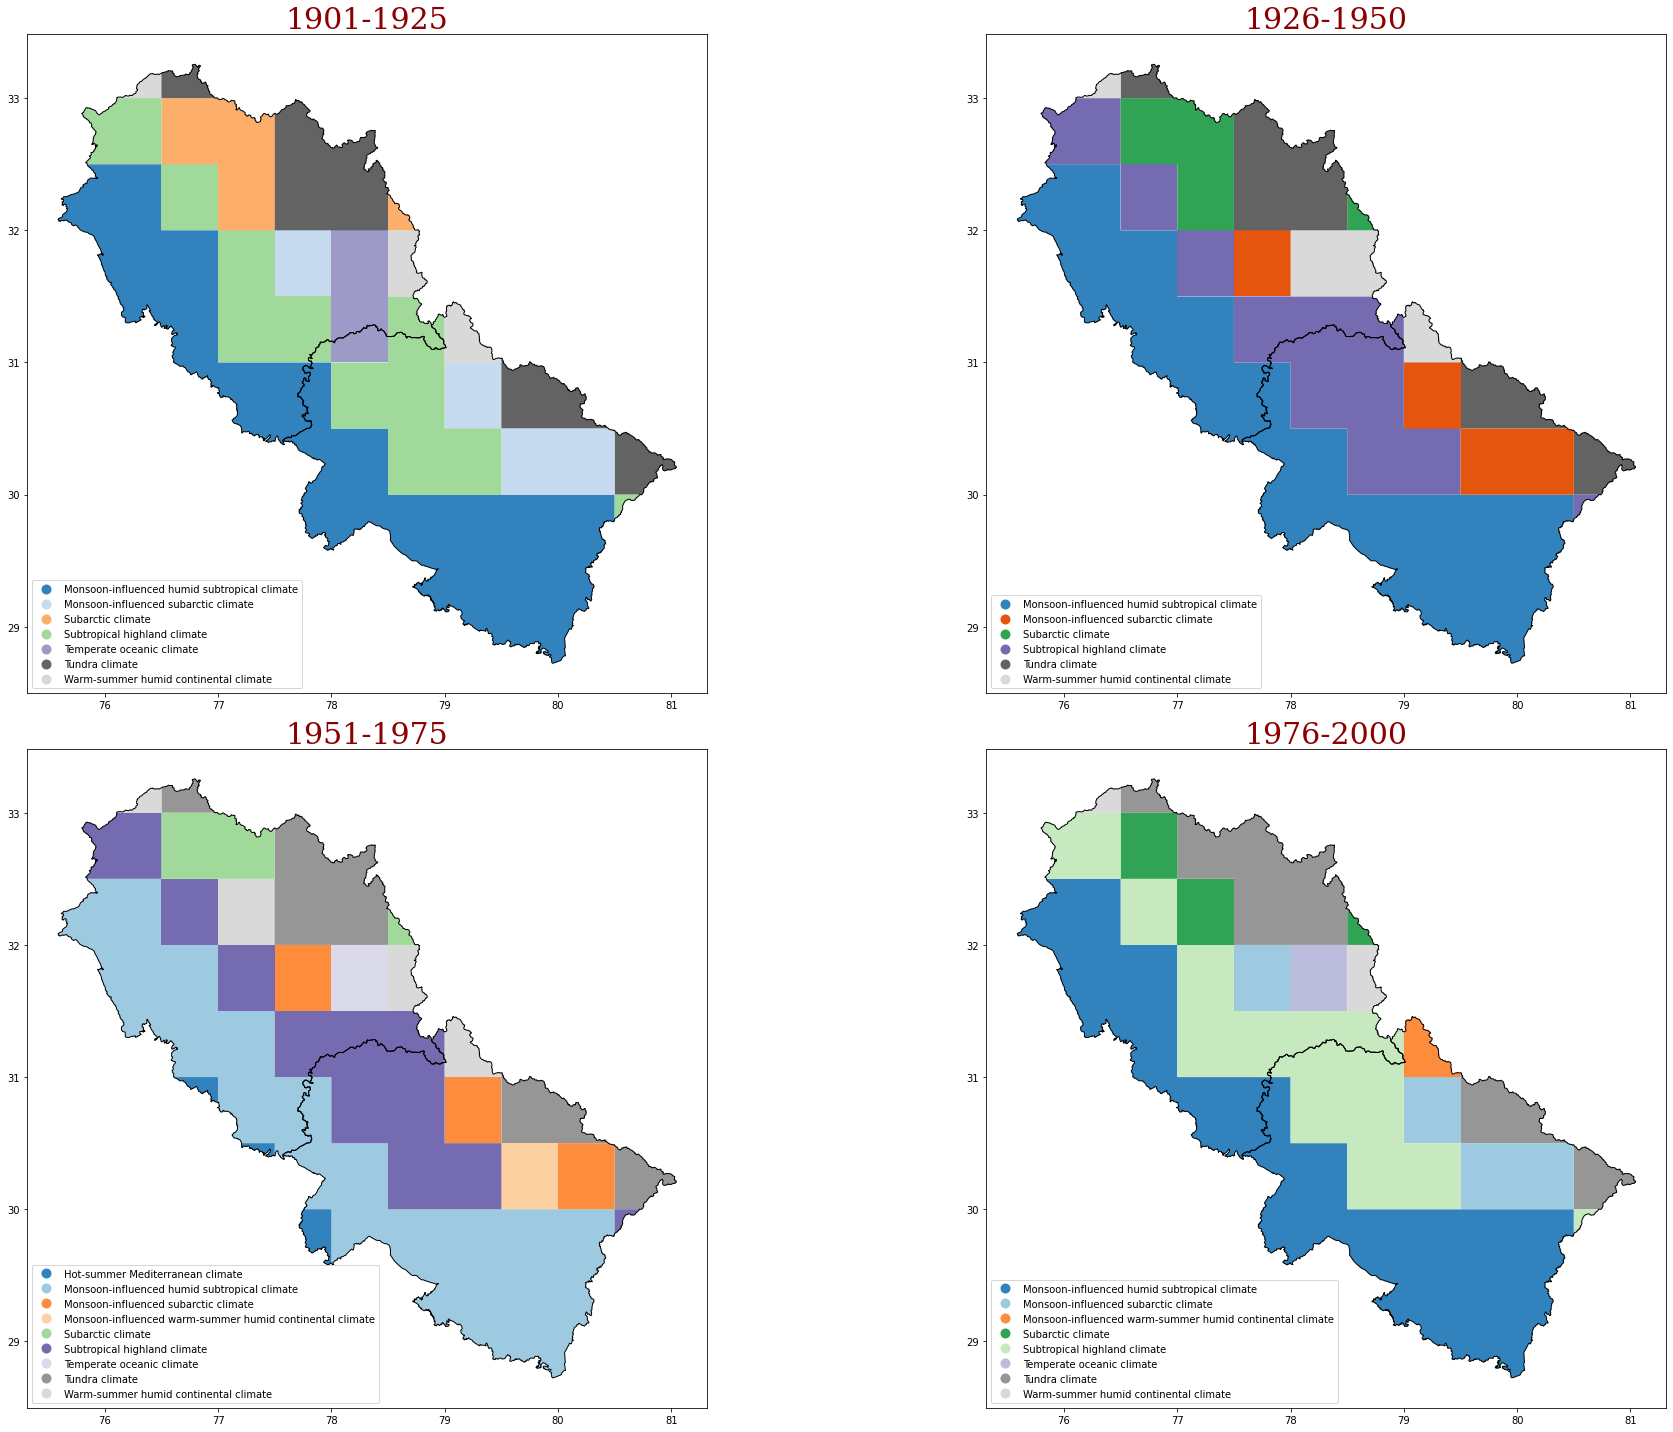

In [45]:
plot_shift(cc_list)

## 9.2 A1FI Emission Scenario

In [46]:
def emission_list(l, emission_file):
    names = [i[29:38] + '_' + i[39:l] for i in emission_file]  
    files_loaded = [gpd.read_file(f).clip(concat_boundary_df) for f in emission_file]
    for f in files_loaded:    
        f.columns = f.columns.str.lower()
        f.gridcode = f.gridcode.astype('int')
        f.gridcode = f.gridcode.astype('str').replace(koppen_abb)
        f.gridcode = f.gridcode.astype('str').replace(koppen_term)    

    return(list(zip(names, files_loaded)))
    

In [58]:
files_loaded[0]

,objectid,id,shape_length,shape_area
count,21.000000,21.000000,21.000000,21.000000
mean,1207.809524,1207.809524,19.190476,15.476190
std,66.615028,66.615028,51.022171,47.067764
min,1133.000000,1133.000000,2.000000,0.250000
25%,1166.000000,1166.000000,2.000000,0.250000
50%,1184.000000,1184.000000,2.000000,0.250000
75%,1225.000000,1225.000000,4.000000,0.750000
max,1437.000000,1437.000000,199.000000,168.000000


In [47]:
A1FI_list = emission_list(43, A1FIfiles)
A1FI_list = sort_tuple(A1FI_list)

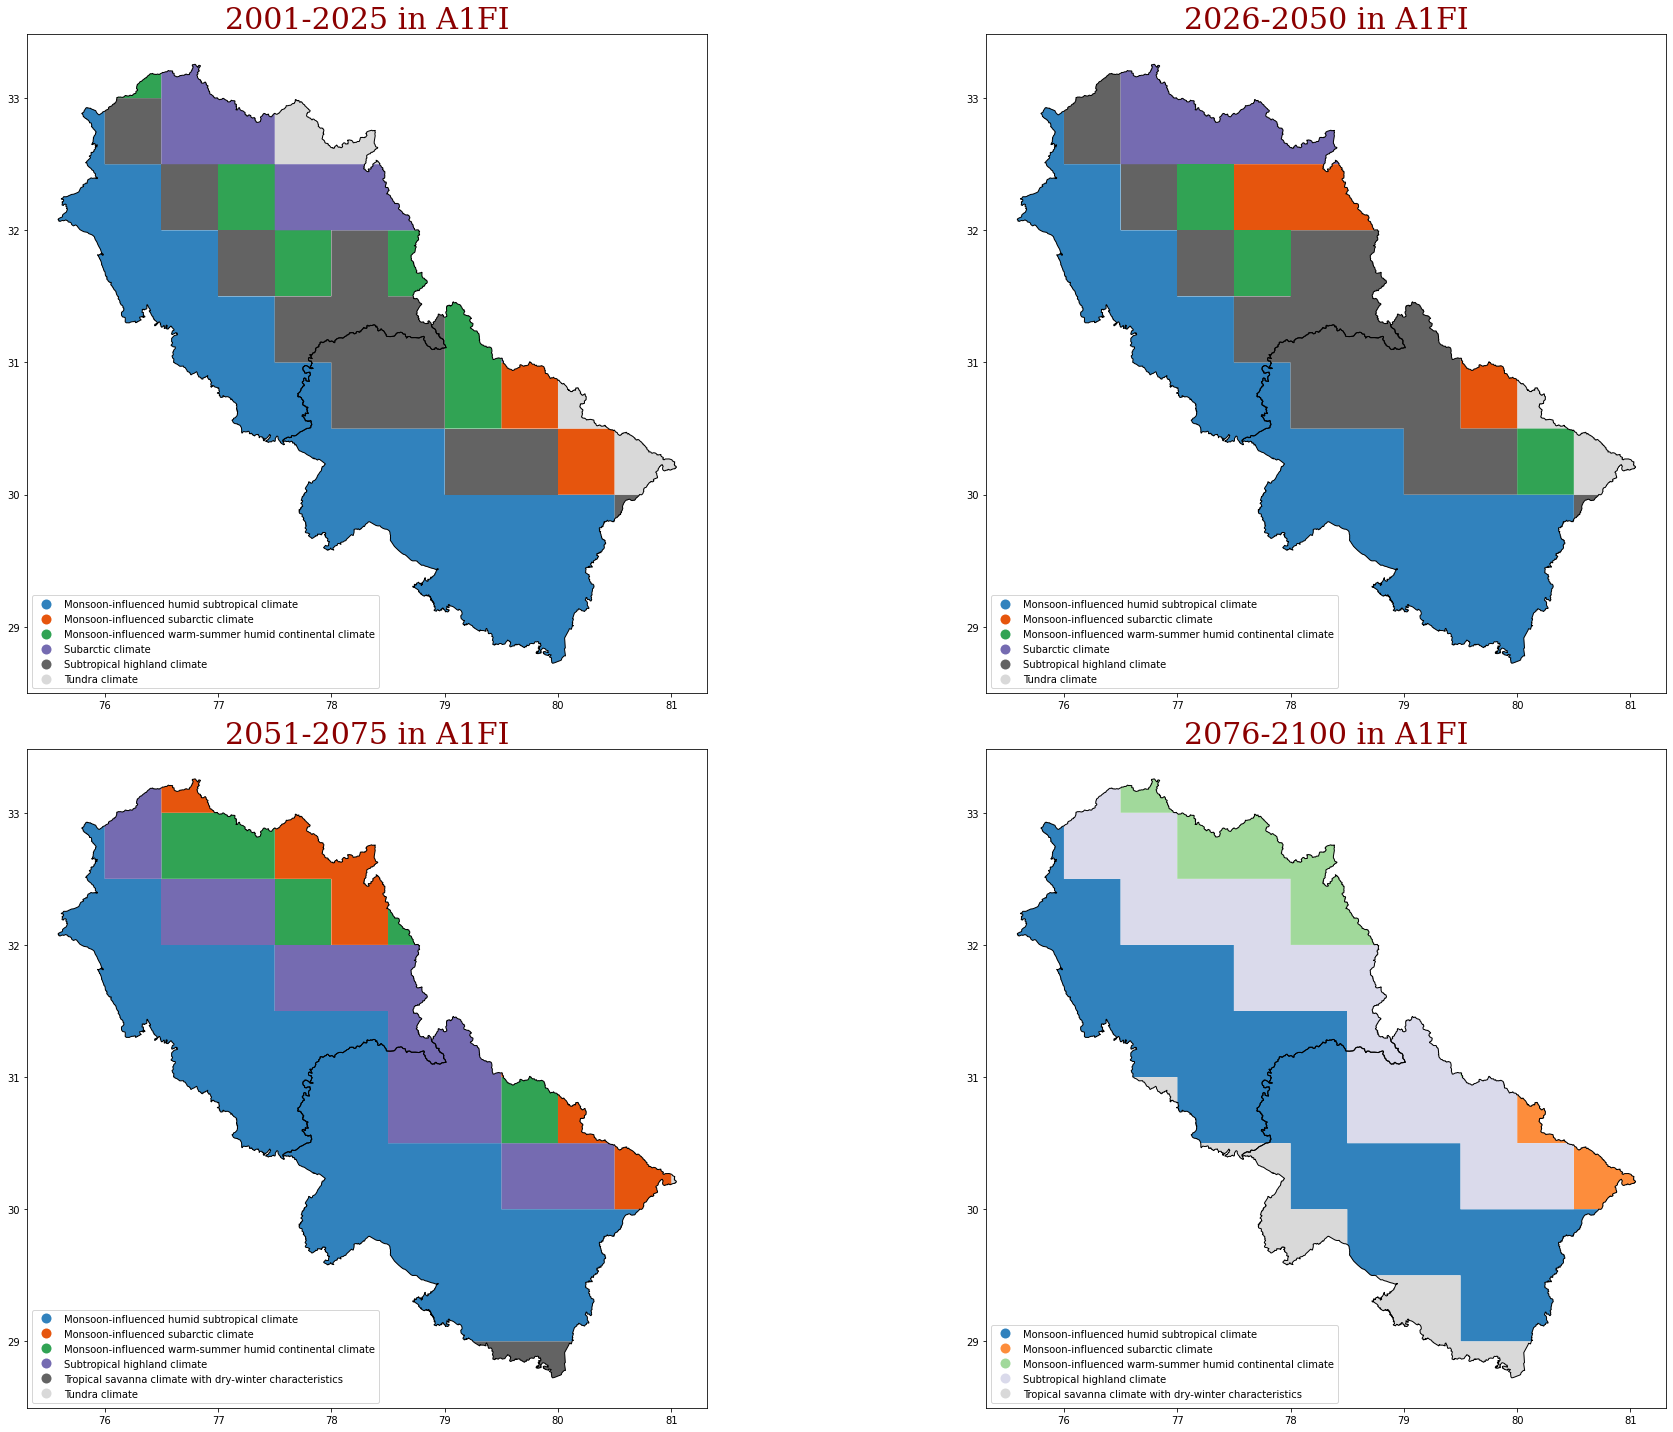

In [48]:
plot_shift(A1FI_list)

## 9.3 A2 Emission Scenario

In [49]:
A2_list = emission_list(41, A2files)
A2_list = sort_tuple(A2_list)

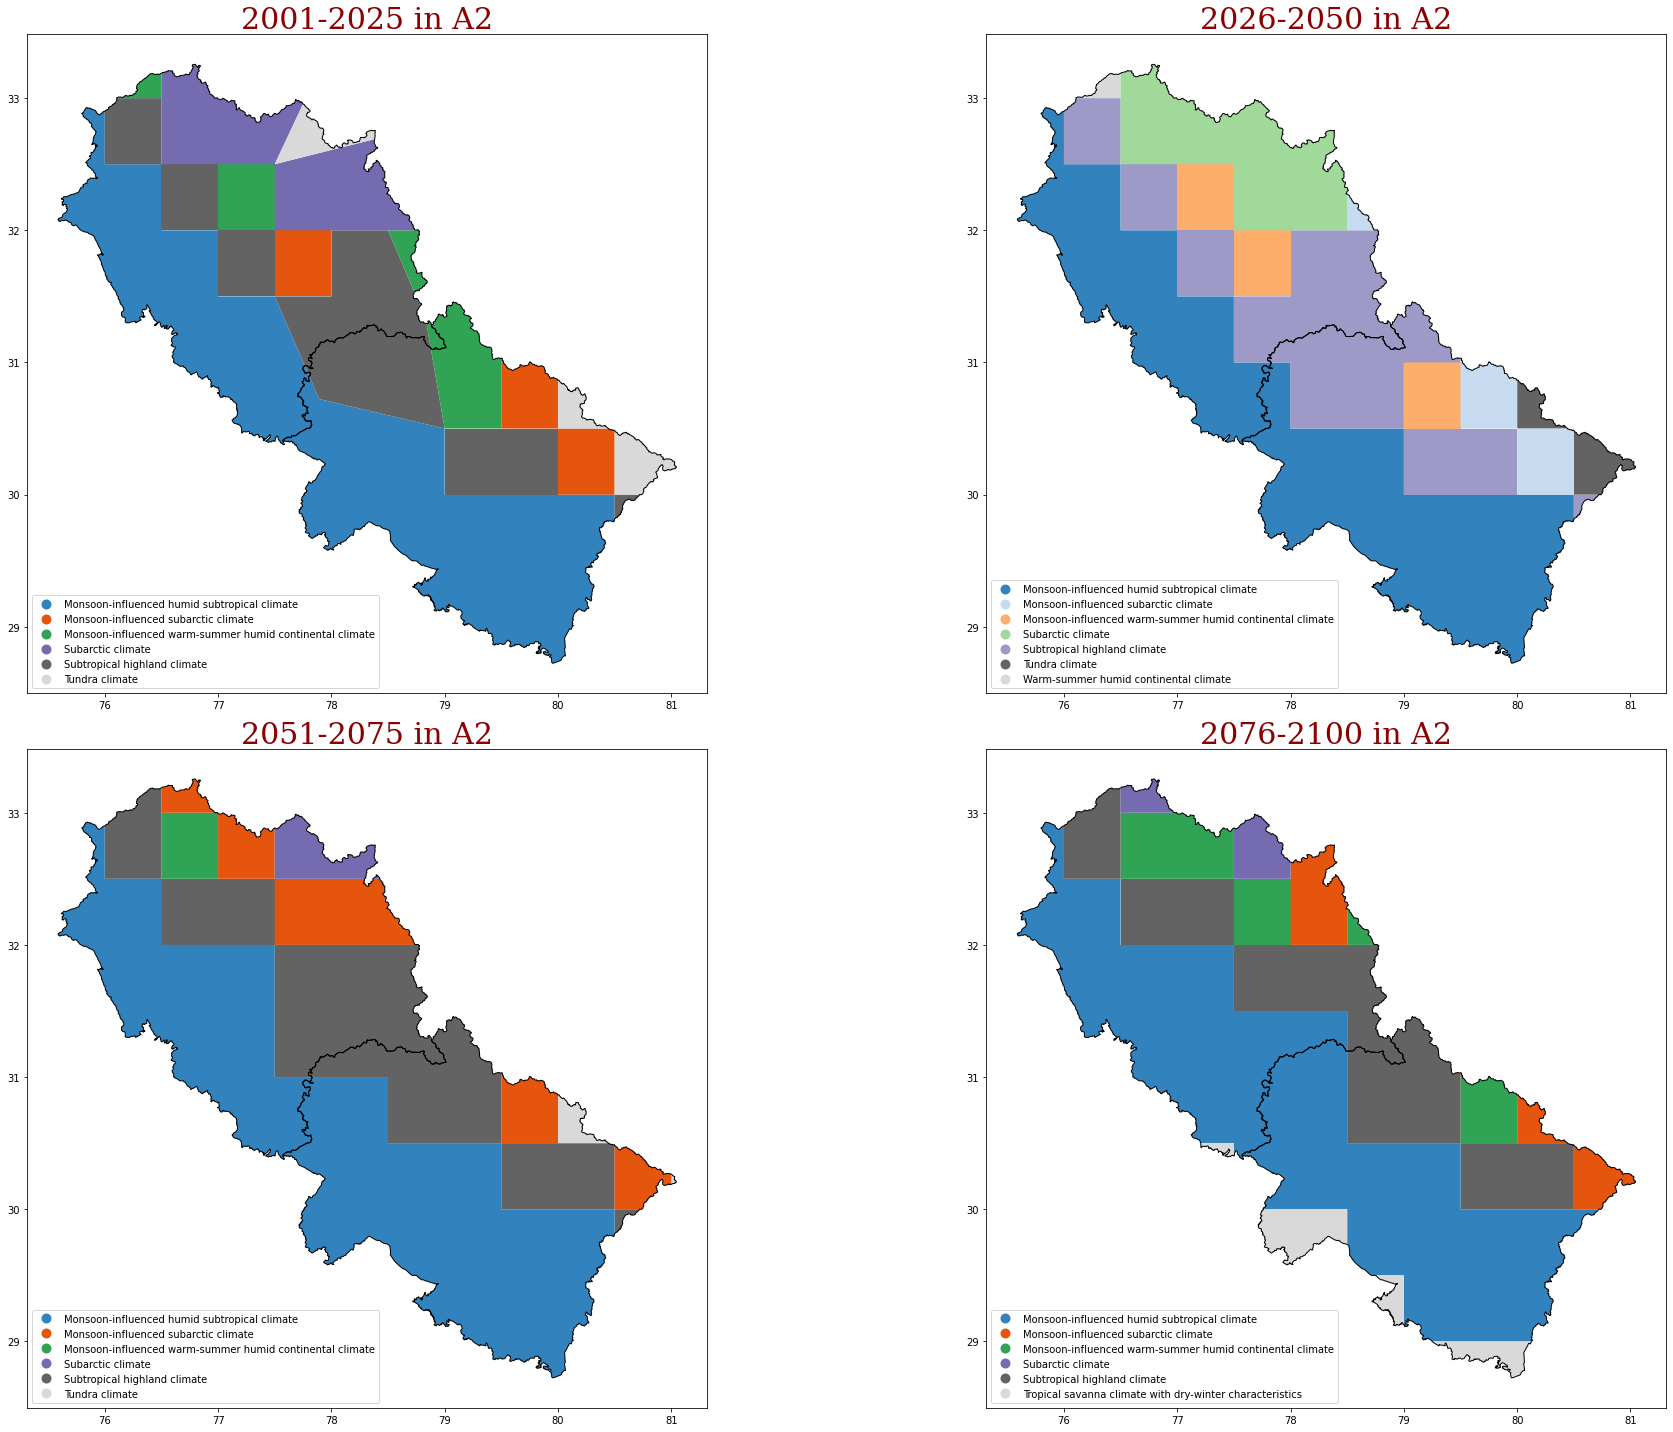

In [50]:
plot_shift(A2_list)

## 9.4 B1 Emission Scenario

In [51]:
B1_list = emission_list(41, B1files)
B1_list = sort_tuple(B1_list)

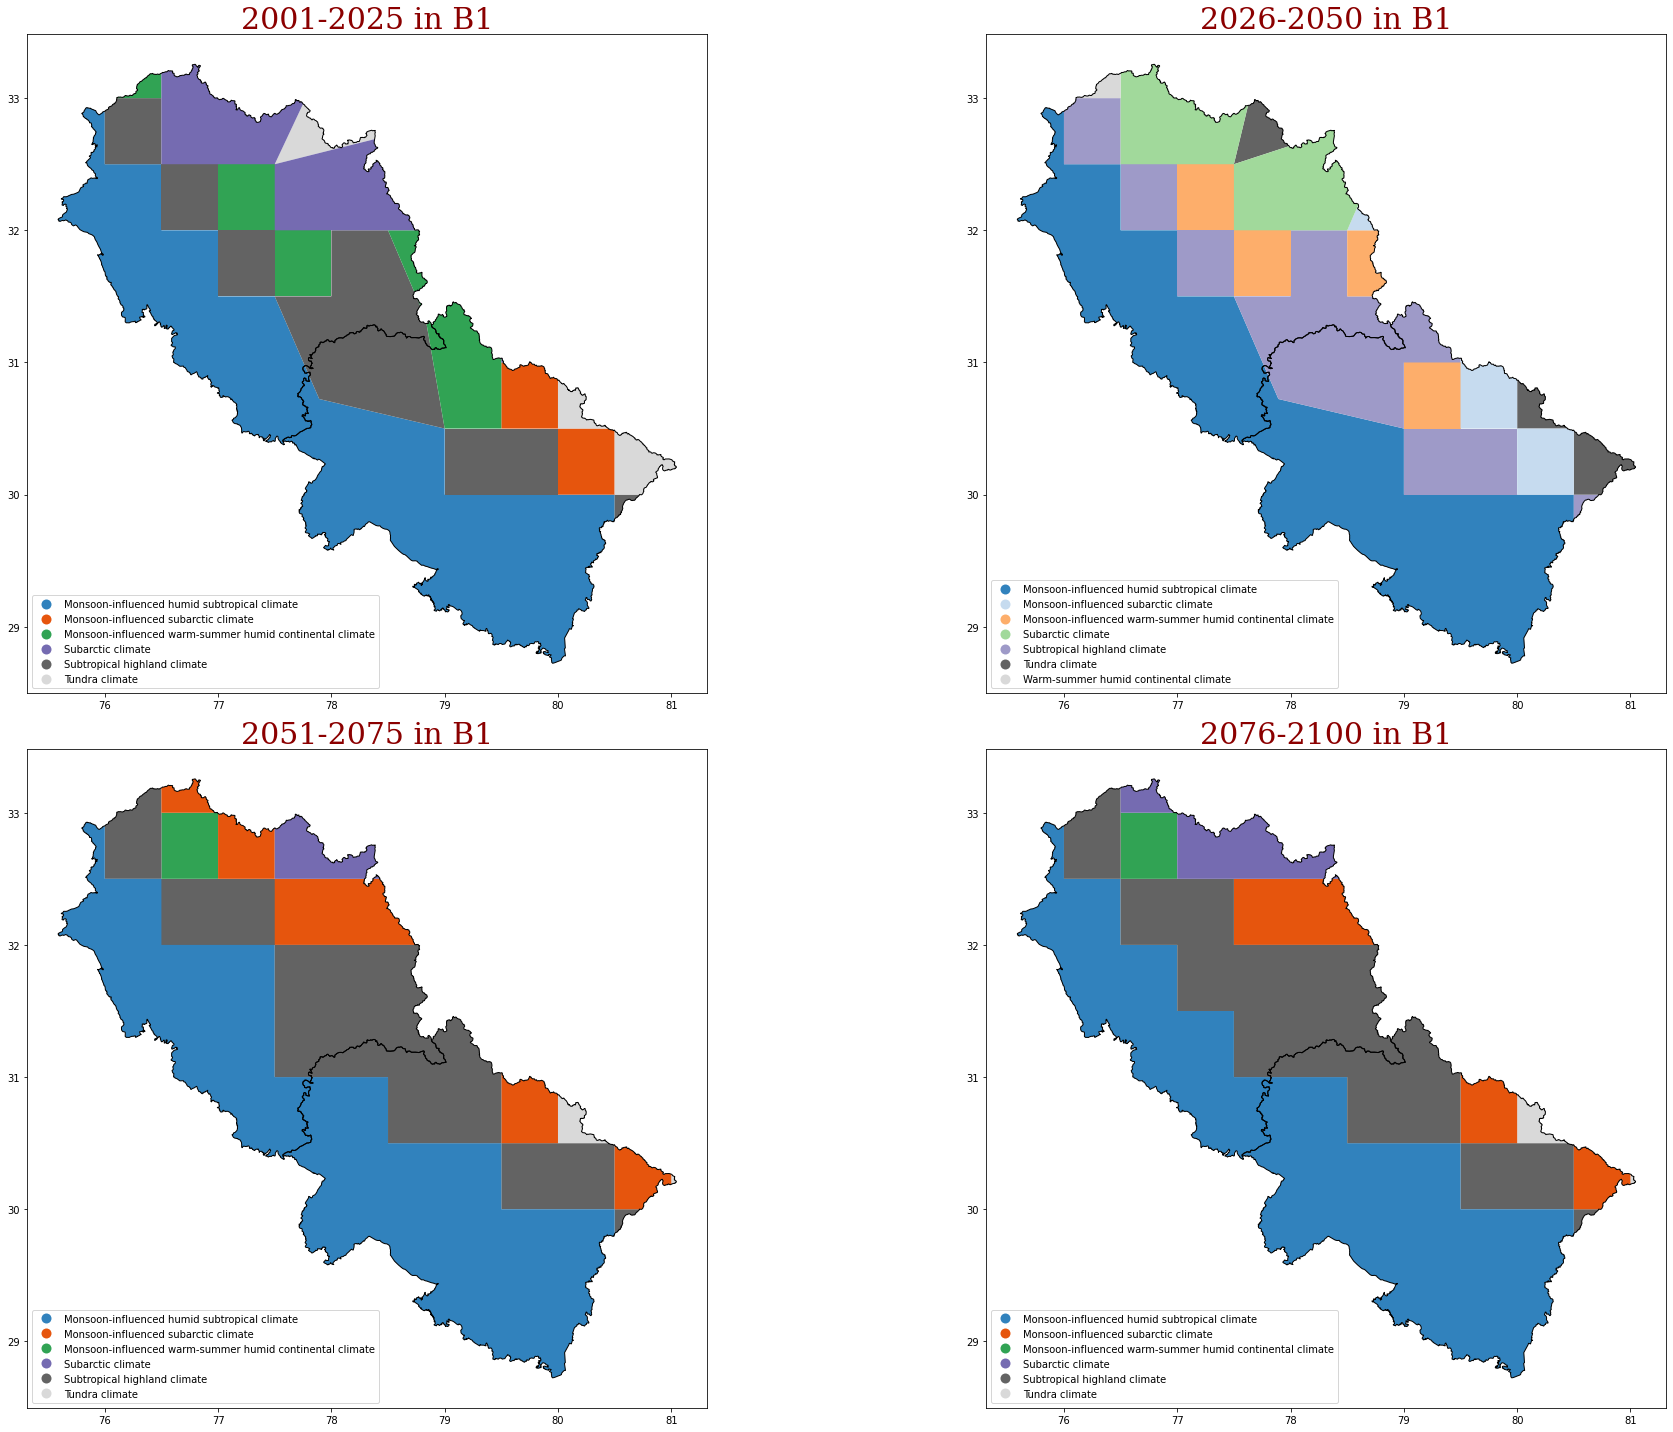

In [52]:
plot_shift(B1_list)

# 9.5 B2 Emission Scenario

In [53]:
B2_list = emission_list(41, B2files)
B2_list = sort_tuple(B2_list)

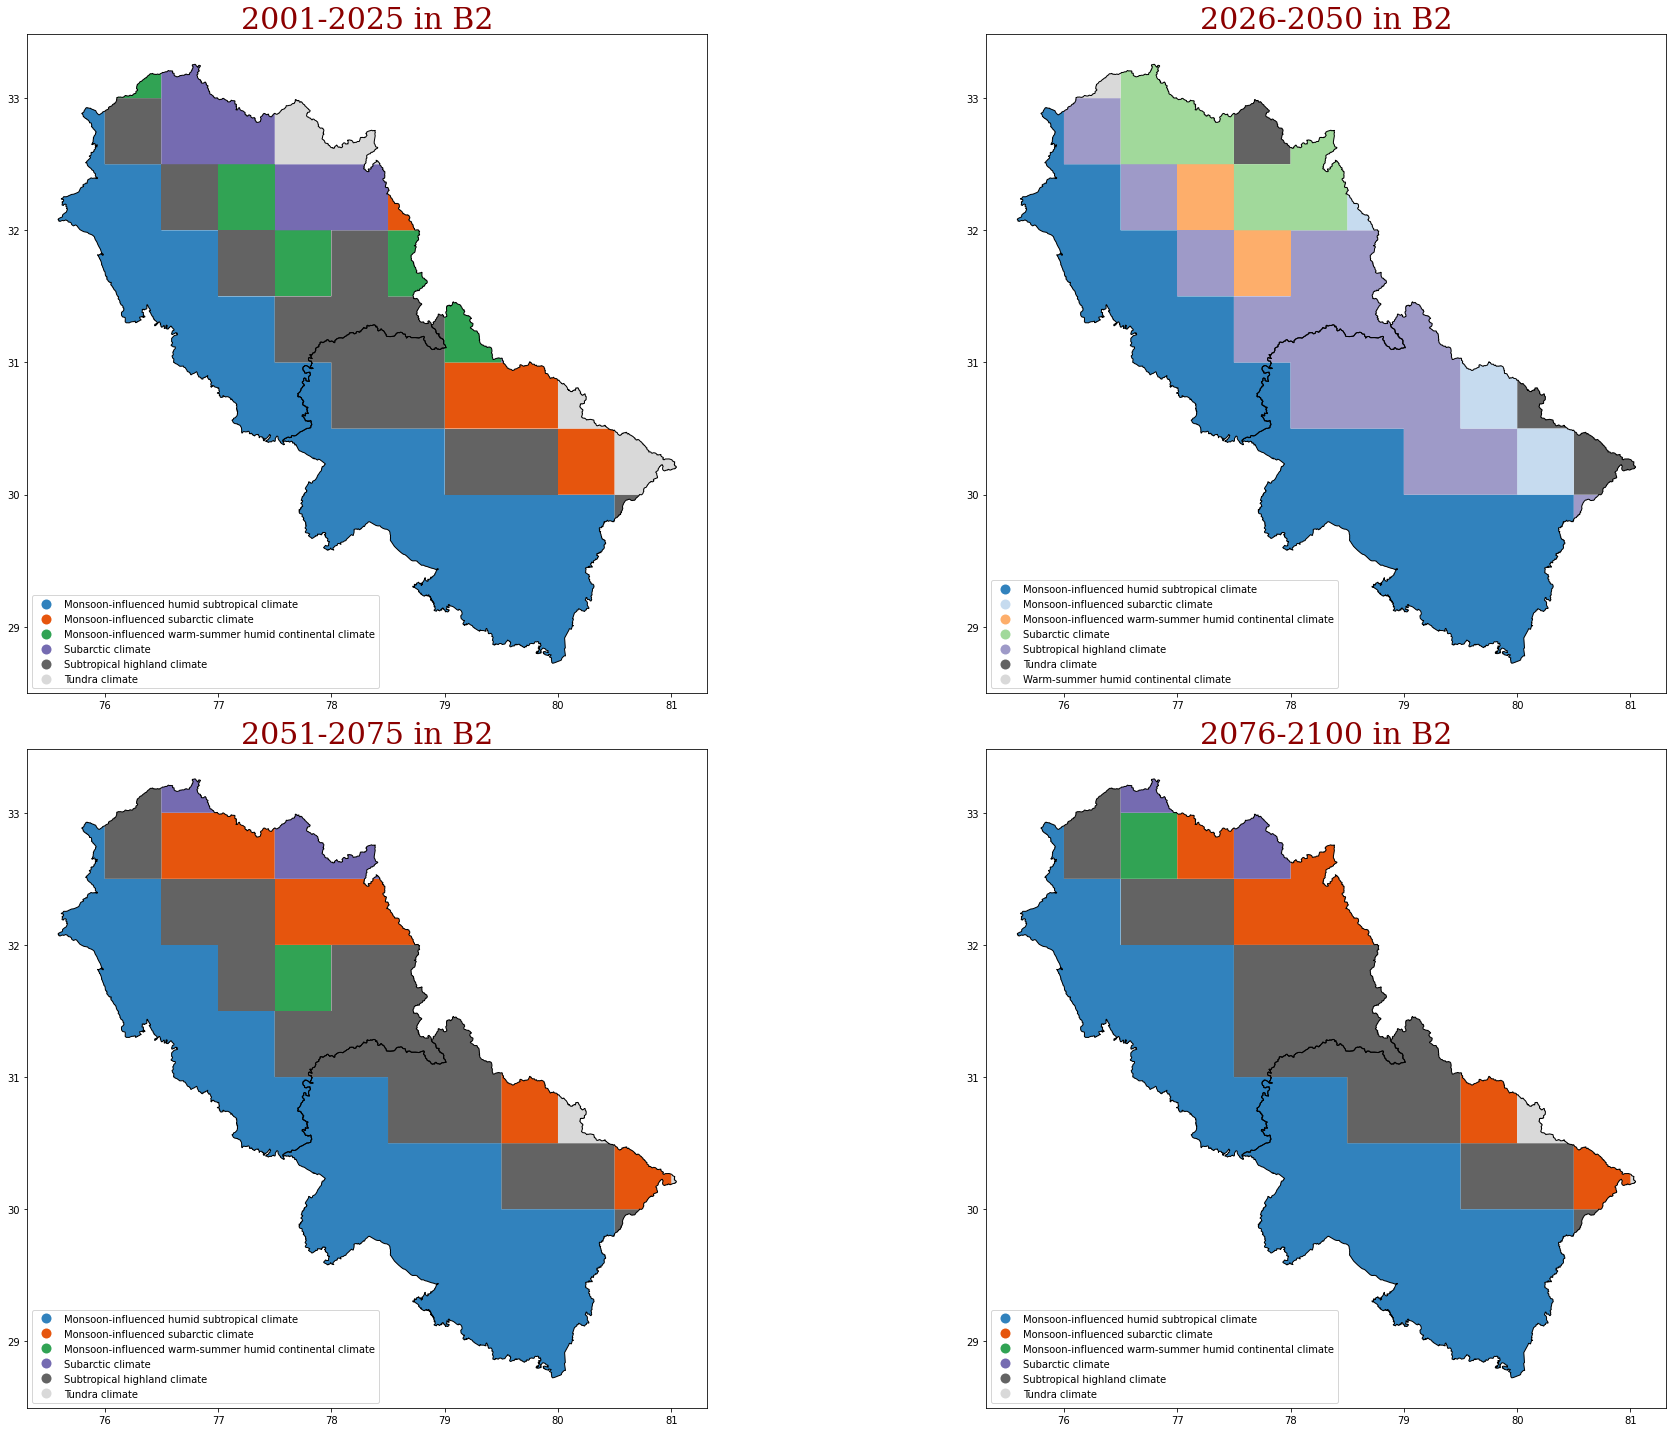

In [54]:
plot_shift(B2_list)